**Question 5**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import tensorflow as tf
from sklearn.metrics import accuracy_score

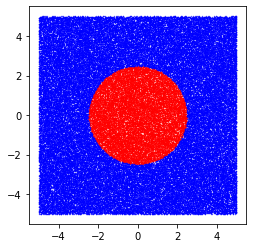

In [2]:
#Training data generation 
points        = np.random.rand(100000, 2) * 10 - 5
labels        = np.sqrt(np.sum((points - np.array([[0, 0]])) ** 2, axis=1)) <= 2.5
train_dataset = torch.utils.data.TensorDataset(torch.as_tensor(points, dtype=torch.float32), torch.as_tensor(labels, dtype=torch.float32).unsqueeze(-1))
train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

plt.scatter(points[labels == 1, 0], points[labels == 1, 1], c='red', s=0.1)
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', s=0.1)
plt.axis('square')
plt.show()

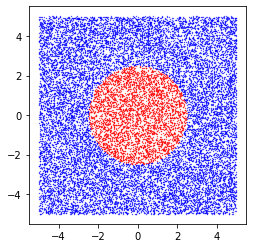

In [3]:
#validation data genaration
points      = np.random.rand(20000, 2) * 10 - 5
labels      = np.sqrt(np.sum((points - np.array([[0, 0]])) ** 2, axis=1)) <= 2.5
val_dataset = torch.utils.data.TensorDataset(torch.as_tensor(points, dtype=torch.float32), torch.as_tensor(labels, dtype=torch.float32).unsqueeze(-1))
val_loader  = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)

plt.scatter(points[labels == 1, 0], points[labels == 1, 1], c='red', s=0.1)
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', s=0.1)
plt.axis('square')
plt.show()

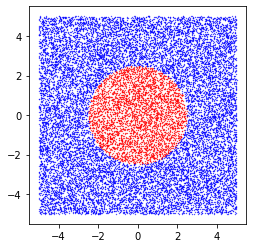

In [5]:
#Testing data generation
points       = np.random.rand(20000, 2) * 10 - 5
labels       = np.sqrt(np.sum((points - np.array([[0, 0]])) ** 2, axis=1)) <= 2.5
test_len     = len(val_loader)
test_dataset = torch.utils.data.TensorDataset(torch.as_tensor(points, dtype=torch.float32), torch.as_tensor(labels, dtype=torch.float32).unsqueeze(-1))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20000, shuffle=False)

plt.scatter(points[labels == 1, 0], points[labels == 1, 1], c='red', s=0.1)
plt.scatter(points[labels == 0, 0], points[labels == 0, 1], c='blue', s=0.1)
plt.axis('square')
plt.show()

In [6]:
 def plot_graph(epochs, info, legend):
        plt.plot(epochs, info, label=legend)
        plt.xlabel("epochs")
        plt.ylabel(legend)
        plt.legend()
        plt.show()#;

In [7]:
def find_acc(labels, preds):
  preds_bool  = preds>0.5
  preds_float = torch.as_tensor(preds_bool, dtype=torch.float32)
  accuracy    = accuracy_score(labels, preds_float)
  return accuracy



In [8]:
def test(test_loader):
  test_features, test_labels = next(iter(test_loader))
  test_preds                 = model(test_features)
  accuracy                   = find_acc(test_labels, test_preds)
  print("Test accuracy is: %.2f" %accuracy)
  #print("Test length: ",len(test_labels) )

**5a**

Epoch 0. Training Loss: 0.07198791950941086
Epoch  0  box plot: 


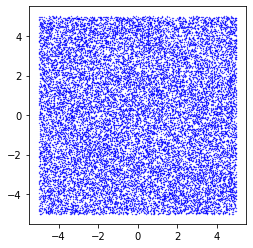


Epoch 1. Training Loss: 0.0300686527043581
Epoch  1  box plot: 


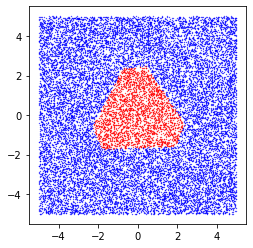


Epoch 2. Training Loss: 0.053222957998514175
Epoch  2  box plot: 


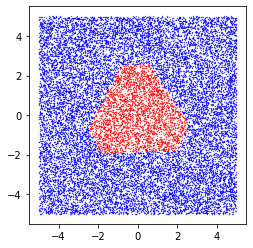


Epoch 3. Training Loss: 0.03628896176815033
Epoch  3  box plot: 


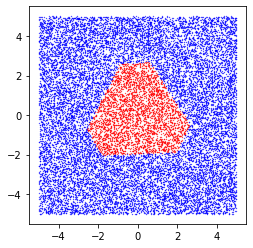


Epoch 4. Training Loss: 0.015939418226480484
Epoch  4  box plot: 


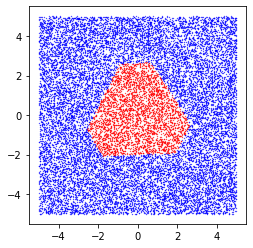


Epoch 5. Training Loss: 0.045589473098516464
Epoch  5  box plot: 


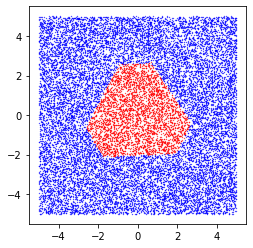


Epoch 6. Training Loss: 0.015806950628757477
Epoch  6  box plot: 


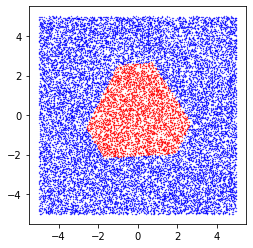


Epoch 7. Training Loss: 0.020923374220728874
Epoch  7  box plot: 


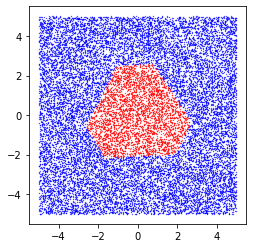


Epoch 8. Training Loss: 0.041206710040569305
Epoch  8  box plot: 


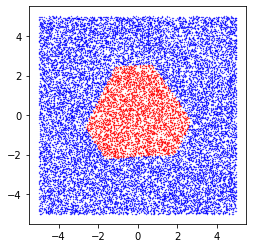


Epoch 9. Training Loss: 0.024873603135347366
Epoch  9  box plot: 


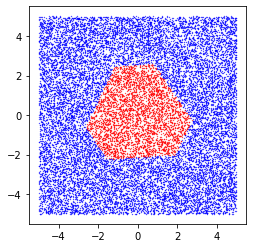

In [9]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 1),
    torch.nn.Sigmoid(),
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.MSELoss()

epochs     = [] 
train_loss = []
val_acc    = []

for epoch in range(10):
    total_train_loss = 0.0
    for points, labels in train_loader:
        preds             = model(points)
        loss              = criterion(preds, labels)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        sys.stdout.write(f'\rEpoch {epoch}. Training Loss: {loss.item()}')
        sys.stdout.flush()
    avg_loss = total_train_loss/len(train_loader.sampler)
    train_loss.append(avg_loss)
    total_val_acc = 0.0
    batch_cnt     = 0
    with torch.no_grad():
        total_val_loss = 0.0
        for points, labels in val_loader:
            preds           = model(points)
            total_val_loss += criterion(preds, labels)
            preds           = preds.squeeze(1).detach().numpy()
            points          = points.detach().numpy()
            accuracy        = find_acc(labels, preds)
            total_val_acc  += accuracy
            batch_cnt      += 1
            plt.scatter(points[preds >= 0.5, 0], points[preds >= 0.5, 1], c='red', s=0.1)
            plt.scatter(points[preds < 0.5, 0], points[preds < 0.5, 1], c='blue', s=0.1)
        avg_val_loss        = total_val_loss.item() / len(val_loader)
    epoch_acc = total_val_acc/batch_cnt
    val_acc.append(epoch_acc)
    epochs.append(epoch)
    print()
    print("Epoch ", epoch, " box plot: ")
    plt.axis('square')
    plt.show()
    print()
print()
print()

Training loss for Qxn 5a


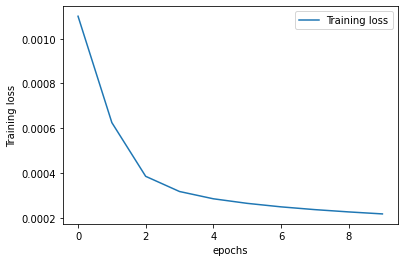


Validation acccuracy for Qxn 5a


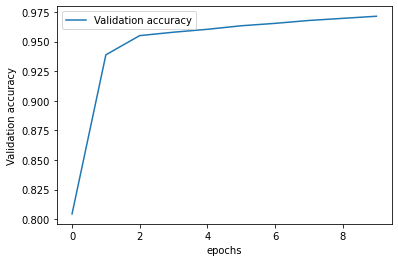


Test accuracy is: 0.97


In [10]:
#plotting training loss 
print("Training loss for Qxn 5a")
plot_graph(epochs, train_loss, "Training loss")
print()

#plotting validation accuracy
print("Validation acccuracy for Qxn 5a")
plot_graph(epochs, val_acc, "Validation accuracy")
print()
#Computing test accuracy
test(test_loader)

**5b**

Epoch 0. Training Loss: 0.11482922732830048
Epoch  0  box plot: 


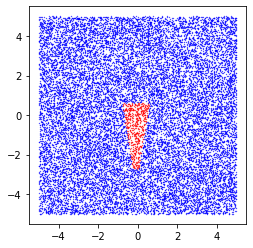


Epoch 50. Training Loss: 0.07354432344436646
Epoch  50  box plot: 


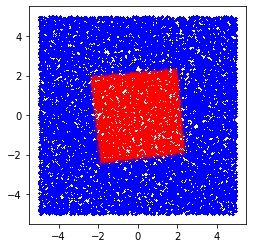


Epoch 100. Training Loss: 0.018787166103720665
Epoch  100  box plot: 


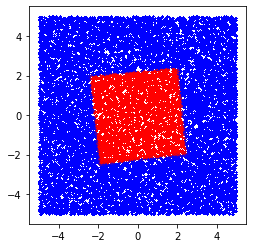


Epoch 150. Training Loss: 0.06514102220535278
Epoch  150  box plot: 


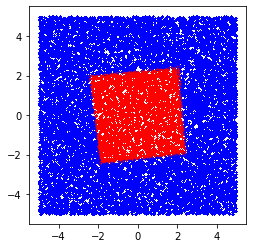


Epoch 200. Training Loss: 0.012623961083590984
Epoch  200  box plot: 


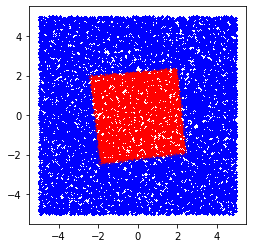


Epoch 250. Training Loss: 0.02252775803208351
Epoch  250  box plot: 


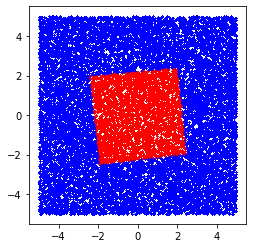


Epoch 300. Training Loss: 0.0003555655130185187
Epoch  300  box plot: 


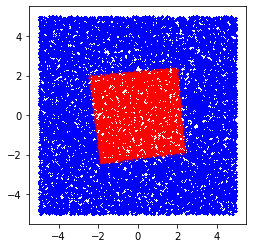


Epoch 350. Training Loss: 0.03946566581726074
Epoch  350  box plot: 


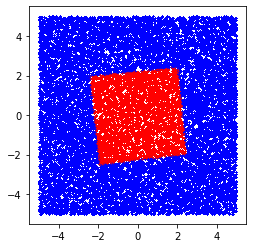


Epoch 400. Training Loss: 0.011118308641016483
Epoch  400  box plot: 


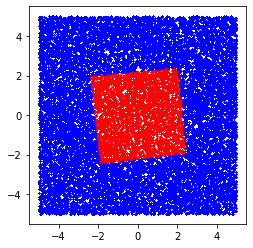


Epoch 450. Training Loss: 0.02382364124059677
Epoch  450  box plot: 


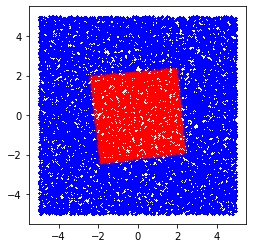


Epoch 499. Training Loss: 0.03717225790023804



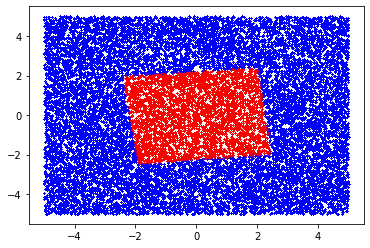

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 1),
    torch.nn.Sigmoid(),
)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.MSELoss()

epochs     = [] 
train_loss = []
val_acc    = []

for epoch in range(500):
    total_train_loss = 0.0
    for points, labels in train_loader:
        preds             = model(points)
        loss              = criterion(preds, labels)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        sys.stdout.write(f'\rEpoch {epoch}. Training Loss: {loss.item()}')
        sys.stdout.flush()
    avg_loss = total_train_loss/len(train_loader.sampler)
    train_loss.append(avg_loss)
    total_val_acc = 0.0
    batch_cnt     = 0
    with torch.no_grad():
        total_val_loss = 0.0
        for points, labels in val_loader:
            preds           = model(points)
            total_val_loss += criterion(preds, labels)
            preds           = preds.squeeze(1).detach().numpy()
            points          = points.detach().numpy()
            accuracy        = find_acc(labels, preds)
            total_val_acc  += accuracy
            batch_cnt      += 1
            plt.scatter(points[preds >= 0.5, 0], points[preds >= 0.5, 1], c='red', s=0.1)
            plt.scatter(points[preds < 0.5, 0], points[preds < 0.5, 1], c='blue', s=0.1)
        avg_val_loss        = total_val_loss.item() / len(val_loader)
    epoch_acc = total_val_acc/batch_cnt
    val_acc.append(epoch_acc)
    epochs.append(epoch)
    if epoch%50 == 0:
      print()
      print("Epoch ", epoch, " box plot: ")
      plt.axis('square')
      plt.show()
      print()
print()
print()

Training loss for Qxn 5b


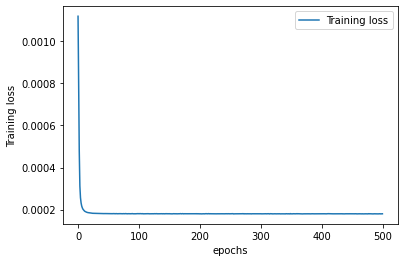


Validation acccuracy for Qxn 5b


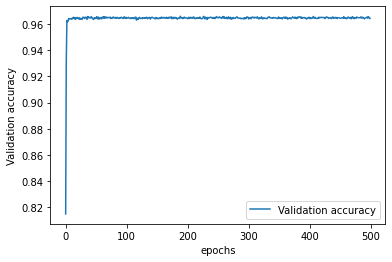


Test accuracy is: 0.97


In [11]:
#plotting training loss 
print("Training loss for Qxn 5b")
plot_graph(epochs, train_loss, "Training loss")
print()

#plotting validation accuracy
print("Validation acccuracy for Qxn 5b")
plot_graph(epochs, val_acc, "Validation accuracy")
print()
#Computing test accuracy
test(test_loader)

**5c**

Epoch 0. Training Loss: 0.03147256001830101
Epoch  0  box plot: 


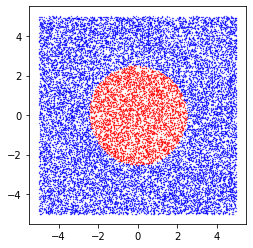


Epoch 10. Training Loss: 0.0420270711183548
Epoch  10  box plot: 


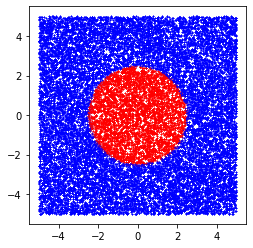


Epoch 20. Training Loss: 0.0010089125717058778
Epoch  20  box plot: 


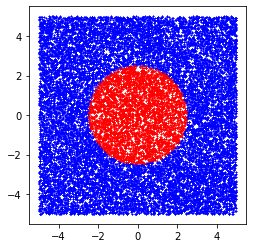


Epoch 30. Training Loss: 0.00037035075365565717
Epoch  30  box plot: 


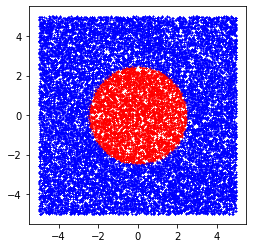


Epoch 40. Training Loss: 6.924219178472413e-06
Epoch  40  box plot: 


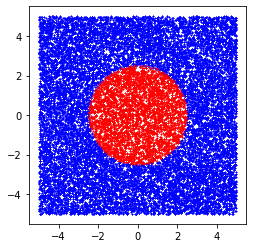


Epoch 50. Training Loss: 0.0
Epoch  50  box plot: 


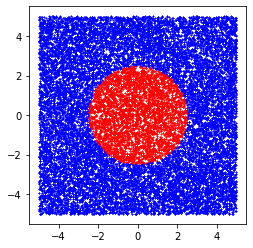


Epoch 60. Training Loss: 0.03959887474775314
Epoch  60  box plot: 


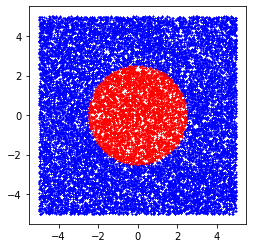


Epoch 70. Training Loss: 0.0
Epoch  70  box plot: 


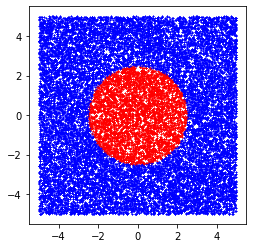


Epoch 80. Training Loss: 0.022741414606571198
Epoch  80  box plot: 


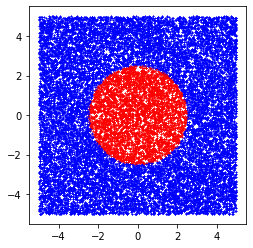


Epoch 90. Training Loss: 2.622709189381567e-06
Epoch  90  box plot: 


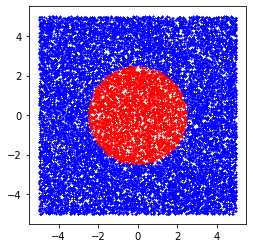


Epoch 99. Training Loss: 0.00479677552357316



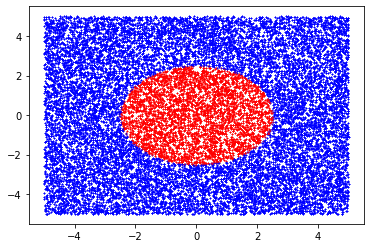

In [13]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1),
    torch.nn.Sigmoid(),
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

epochs     = [] 
train_loss = []
val_acc    = []

for epoch in range(100):
    total_loss = 0
    for points, labels in train_loader:
        preds       = model(points)
        loss        = criterion(preds, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        sys.stdout.write(f'\rEpoch {epoch}. Training Loss: {loss.item()}')
        sys.stdout.flush()
    avg_loss = total_loss/len(train_loader.sampler)
    train_loss.append(avg_loss)
    total_val_acc = 0.0
    batch_cnt     = 0
    with torch.no_grad():
        total_val_loss = 0.0
        for points, labels in val_loader:
            preds           = model(points)
            total_val_loss += criterion(preds, labels)
            preds           = preds.squeeze(1).detach().numpy()
            points          = points.detach().numpy()
            accuracy        = find_acc(labels, preds)
            total_val_acc  += accuracy
            batch_cnt      += 1
            plt.scatter(points[preds >= 0.5, 0], points[preds >= 0.5, 1], c='red', s=0.1)
            plt.scatter(points[preds < 0.5, 0], points[preds < 0.5, 1], c='blue', s=0.1)
        avg_val_loss        = total_val_loss.item() / len(val_loader)
    epoch_acc = total_val_acc/batch_cnt
    val_acc.append(epoch_acc)
    epochs.append(epoch)
    if epoch%10 == 0:
      print()
      print("Epoch ", epoch, " box plot: ")
      plt.axis('square')
      plt.show()
      print()
print()
print()


Training loss for Qxn 5c


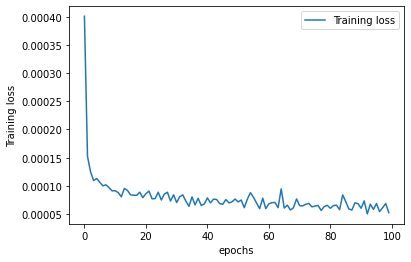


Validation acccuracy for Qxn 5c


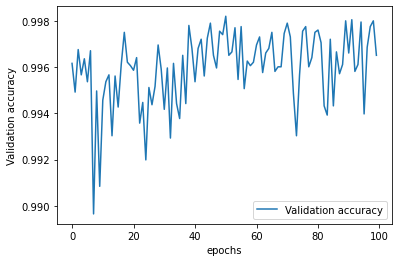


Test accuracy is: 1.00


In [14]:
#plotting training loss 
print("Training loss for Qxn 5c")
plot_graph(epochs, train_loss, "Training loss")
print()

#plotting validation accuracy
print("Validation acccuracy for Qxn 5c")
plot_graph(epochs, val_acc, "Validation accuracy")
print()
#Computing test accuracy
test(test_loader)

**5d**

Epoch 0. Training Loss: 0.0001343495532637462
Epoch  0  box plot: 


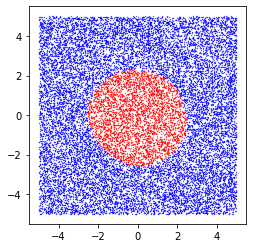


Epoch 10. Training Loss: 0.00029080684180371463
Epoch  10  box plot: 


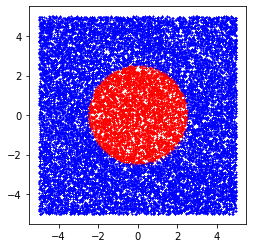


Epoch 20. Training Loss: 3.56530449607817e-06
Epoch  20  box plot: 


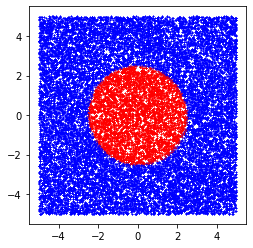


Epoch 30. Training Loss: 0.0034596570767462254
Epoch  30  box plot: 


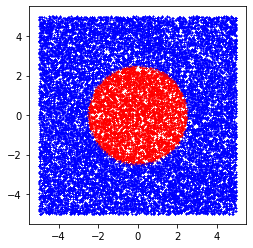


Epoch 40. Training Loss: 0.005731748417019844
Epoch  40  box plot: 


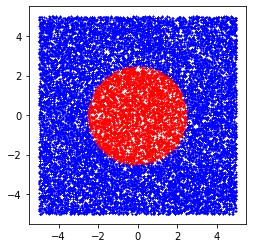


Epoch 50. Training Loss: 0.0338791087269783
Epoch  50  box plot: 


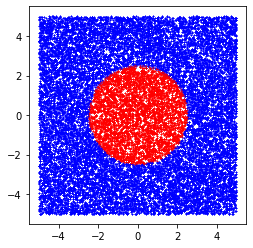


Epoch 60. Training Loss: 0.003381062764674425
Epoch  60  box plot: 


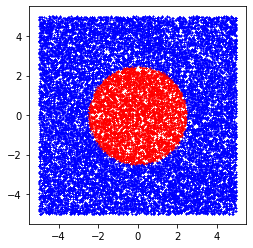


Epoch 70. Training Loss: 0.004259614739567041
Epoch  70  box plot: 


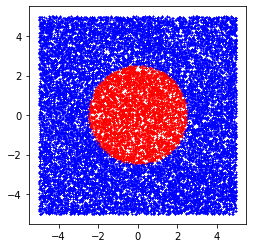


Epoch 80. Training Loss: 0.030899012461304665
Epoch  80  box plot: 


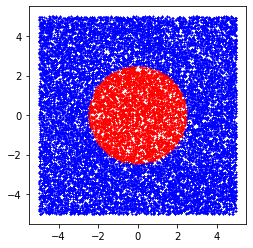


Epoch 90. Training Loss: 0.00014411468873731792
Epoch  90  box plot: 


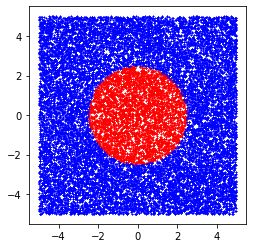


Epoch 99. Training Loss: 0.0385480634868145



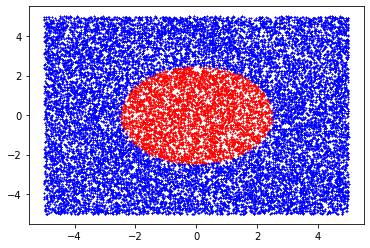

In [15]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
    torch.nn.Sigmoid(),
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

epochs     = [] 
train_loss = []
val_acc    = []

for epoch in range(100):
    total_loss = 0
    for points, labels in train_loader:
        preds       = model(points)
        loss        = criterion(preds, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        sys.stdout.write(f'\rEpoch {epoch}. Training Loss: {loss.item()}')
        sys.stdout.flush()
    avg_loss = total_loss/len(train_loader.sampler)
    train_loss.append(avg_loss)
    total_val_acc = 0.0
    batch_cnt     = 0
    with torch.no_grad():
        total_val_loss = 0.0
        for points, labels in val_loader:
            preds           = model(points)
            total_val_loss += criterion(preds, labels)
            preds           = preds.squeeze(1).detach().numpy()
            points          = points.detach().numpy()
            accuracy        = find_acc(labels, preds)
            total_val_acc  += accuracy
            batch_cnt      += 1
            plt.scatter(points[preds >= 0.5, 0], points[preds >= 0.5, 1], c='red', s=0.1)
            plt.scatter(points[preds < 0.5, 0], points[preds < 0.5, 1], c='blue', s=0.1)
        avg_val_loss        = total_val_loss.item() / len(val_loader)
    epoch_acc = total_val_acc/batch_cnt
    val_acc.append(epoch_acc)
    epochs.append(epoch)
    if epoch%10 == 0:
      print()
      print("Epoch ", epoch, " box plot: ")
      plt.axis('square')
      plt.show()
      print()
print()
print()

Training loss for Qxn 5d


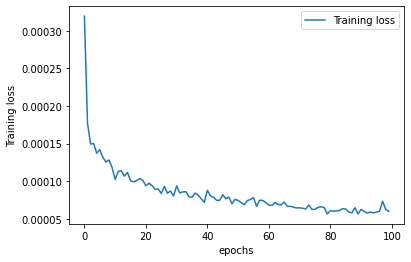


Validation acccuracy for Qxn 5d


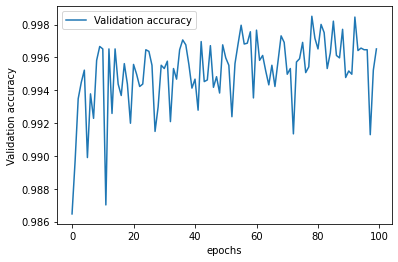


Test accuracy is: 1.00


In [16]:
#plotting training loss 
print("Training loss for Qxn 5d")
plot_graph(epochs, train_loss, "Training loss")
print()

#plotting validation accuracy
print("Validation acccuracy for Qxn 5d")
plot_graph(epochs, val_acc, "Validation accuracy")
print()
#Computing test accuracy
test(test_loader)

**5e**

Epoch 0. Training Loss: 0.036219142377376556
Epoch  0  box plot: 


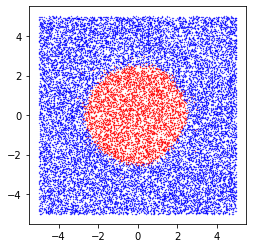


Epoch 10. Training Loss: 0.00028648943407461047
Epoch  10  box plot: 


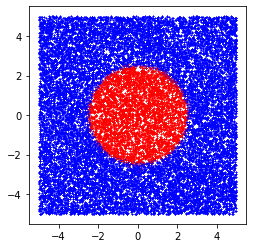


Epoch 20. Training Loss: 0.0742306038737297
Epoch  20  box plot: 


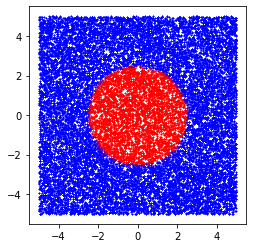


Epoch 30. Training Loss: 0.002268158830702305
Epoch  30  box plot: 


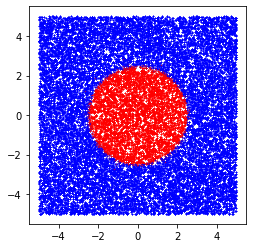


Epoch 40. Training Loss: 1.9037763195228763e-05
Epoch  40  box plot: 


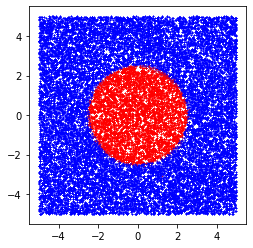


Epoch 50. Training Loss: 0.10317452996969223
Epoch  50  box plot: 


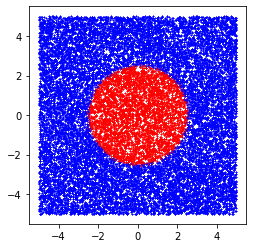


Epoch 60. Training Loss: 0.0009858377743512392
Epoch  60  box plot: 


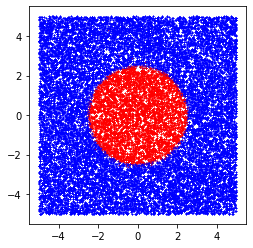


Epoch 70. Training Loss: 0.003613769542425871
Epoch  70  box plot: 


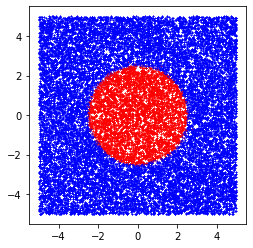


Epoch 80. Training Loss: 6.717065116390586e-05
Epoch  80  box plot: 


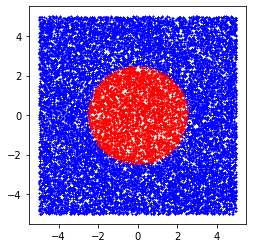


Epoch 90. Training Loss: 0.0009144797804765403
Epoch  90  box plot: 


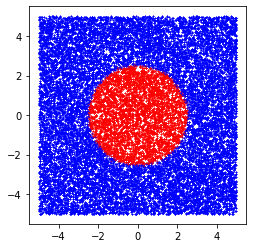


Epoch 99. Training Loss: 0.0009171394049189985



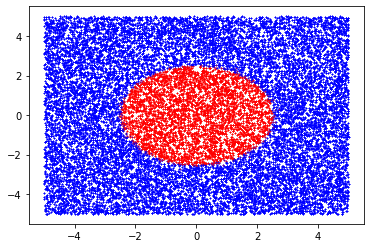

In [17]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 32),
    torch.nn.ReLU(),

    torch.nn.Dropout(p=0.2),

    torch.nn.Linear(32, 64),
    torch.nn.ReLU(),

    torch.nn.Dropout(p=0.2),

    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),

    torch.nn.Dropout(p=0.2),

    torch.nn.Linear(32, 1),
    torch.nn.Sigmoid(),
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

epochs     = [] 
train_loss = []
val_acc    = []

for epoch in range(100):
    total_loss = 0
    for points, labels in train_loader:
        preds       = model(points)
        loss        = criterion(preds, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        sys.stdout.write(f'\rEpoch {epoch}. Training Loss: {loss.item()}')
        sys.stdout.flush()
    avg_loss = total_loss/len(train_loader.sampler)
    train_loss.append(avg_loss)
    total_val_acc = 0.0
    batch_cnt     = 0
    with torch.no_grad():
        total_val_loss = 0.0
        for points, labels in val_loader:
            preds           = model(points)
            total_val_loss += criterion(preds, labels)
            preds           = preds.squeeze(1).detach().numpy()
            points          = points.detach().numpy()
            accuracy        = find_acc(labels, preds)
            total_val_acc  += accuracy
            batch_cnt      += 1
            plt.scatter(points[preds >= 0.5, 0], points[preds >= 0.5, 1], c='red', s=0.1)
            plt.scatter(points[preds < 0.5, 0], points[preds < 0.5, 1], c='blue', s=0.1)
        avg_val_loss        = total_val_loss.item() / len(val_loader)
    epoch_acc = total_val_acc/batch_cnt
    val_acc.append(epoch_acc)
    epochs.append(epoch)
    if epoch%10 == 0:
      print()
      print("Epoch ", epoch, " box plot: ")
      plt.axis('square')
      plt.show()
      print()
print()
print()

Training loss for Qxn 5e


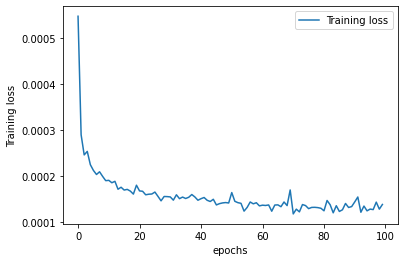


Validation acccuracy for Qxn 5e


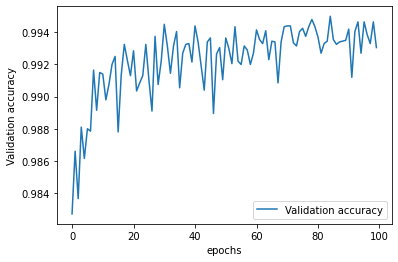


Test accuracy is: 0.99


In [18]:
#plotting training loss 
print("Training loss for Qxn 5e")
plot_graph(epochs, train_loss, "Training loss")
print()

#plotting validation accuracy
print("Validation acccuracy for Qxn 5e")
plot_graph(epochs, val_acc, "Validation accuracy")
print()
#Computing test accuracy
test(test_loader)

output2 = for i 